In [1]:
import chess.pgn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pgn = open("../raw_data/fics_evals.pgn", encoding='UTF-8')

In [5]:
def game_viewer(file):
    # cycle through games
    game = chess.pgn.read_game(file)
    board = game.board()
    moves = list(game.mainline_moves())
    variations = game.mainline()
    game_log = {
        'evals':[],
        'WhiteIsComp':[],
    }
    
    #cycle through evals
    for variation in variations:
        eval = variation.comment
        eval = eval.split('[%eval ')[1].split(']')[0]
        game_log['evals'].append(float(eval))
        game_log['WhiteIsComp'].append(game.headers.get('WhiteIsComp', 'No'))
        
    # PLOT
    plt.figure(figsize=(15,5))
    plt.plot(game_log['evals'])
    zeros = np.zeros(len(game_log['evals']))
    plt.plot(zeros)
    try:
        if game.headers['WhiteIsComp'] == 'Yes':
            plt.title(f"{game.headers['White']}(C) vs {game.headers['Black']}")
    except KeyError:
        plt.title(f"{game.headers['White']} vs {game.headers['Black']}(C)")
    plt.grid()
    print(game)
#     return game_log['evals']

31
[Event "FICS rated blitz game"]
[Site "FICS freechess.org"]
[Date "2021.01.31"]
[Round "?"]
[White "Geforce"]
[Black "forlat"]
[Result "1-0"]
[BlackClock "0:03:00.000"]
[BlackElo "1973"]
[BlackIsComp "Yes"]
[BlackRD "0.0"]
[ECO "B00"]
[FICSGamesDBGameNo "490373541"]
[PlyCount "31"]
[Time "23:55:00"]
[TimeControl "180+0"]
[WhiteClock "0:03:00.000"]
[WhiteElo "2201"]
[WhiteRD "0.0"]

1. e4 { [%eval 79] [%clk 0:10:00] } 1... b6 { [%eval 3] [%clk 0:10:00] } 2. Nf3 { [%eval 184] [%clk 0:10:00] } 2... Bb7 { [%eval 43] [%clk 0:10:00] } 3. Nc3 { [%eval 95] [%clk 0:10:00] } 3... Nf6 { [%eval 59] [%clk 0:10:00] } 4. d3 { [%eval 413] [%clk 0:10:00] } 4... e6 { [%eval 15] [%clk 0:10:00] } 5. Be2 { [%eval 213] [%clk 0:10:00] } 5... Be7 { [%eval -5] [%clk 0:10:00] } 6. Bf1 { [%eval 349] [%clk 0:10:00] } 6... O-O { [%eval -83] [%clk 0:10:00] } 7. Ng5 { [%eval 95] [%clk 0:10:00] } 7... h6 { [%eval -937] [%clk 0:10:00] } 8. h4 { [%eval -87] [%clk 0:10:00] } 8... d5 { [%eval -395] [%clk 0:10:00] } 9.

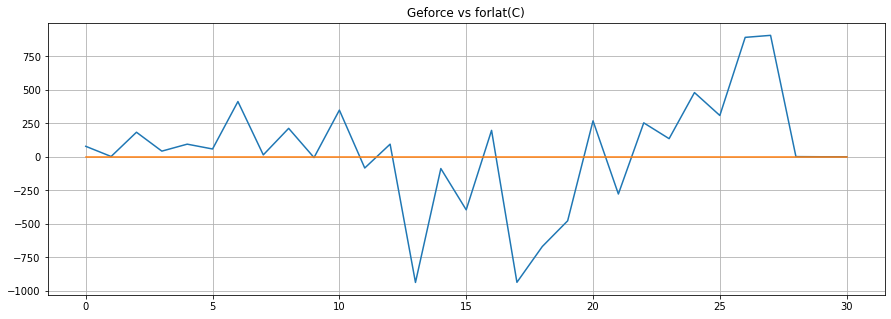

In [6]:
game_viewer(pgn)